<a href="https://colab.research.google.com/github/MohamedS-Siena/computational_physics/blob/main/Mohamed_Shahabuddeen_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt
import math

# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [ ]:
# write your function here
def trap(x,y):
  z=0
  for i in range(1,len(x)):
    z+=(y[i-1]+y[i])/2*(x[i]-x[i-1])
  return z

# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [ ]:
# write your function mycircle here
def mycircle(x,r=2):
  y = np.sqrt(r**2-x**2)
  return y

### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [ ]:
x = np.linspace(-2,2,100)
y = mycircle(x)

a = trap(x,y)
print(f"Area of half of a circle of 2 radius: {a:.5f}")

Area of half of a circle of 2 radius: 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [ ]:
a_theo = 2*np.pi
print(f"numpy function: {a_theo}\nmy function: {a}")

error = (a-a_theo)/a_theo*100
print(f"percent error = {error}%")

numpy function: 6.283185307179586
my function: 6.276436078403621
percent error = -0.10741731217529554%


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [ ]:
x = np.linspace(-2,2,1000)
y = mycircle(x)

a = trap(x,y)
print(f"Area of half of a circle of 2 radius: {a}")

a_theo = 2*np.pi
print(f"numpy function: {a_theo}\nmy function: {a}")

error = (a-a_theo)/a_theo*100
print(f"percent error = {error}%")

Area of half of a circle of 2 radius: 6.28297463809257
numpy function: 6.283185307179586
my function: 6.28297463809257
percent error = -0.003352902655526221%


the accuracy improves with greater amount of steps.

# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [ ]:
def mygauss(x,mean,sigma):
  fx=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*((x-mean)/sigma)**2)
  return fx

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [ ]:
x = np.linspace(-1,1,1000)
y = mygauss(x,0,1)
a = trap(x,y)
a_theo = 0.682
error = (a-a_theo)/a_theo*100
print(f"percent error = {error}%")

percent error = 0.10107485339246954%


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [ ]:
x = np.linspace(-2,2,100)
y = mygauss(x,0,1)
a = trap(x,y)
a_theo = 0.272+0.682
error = (a-a_theo)/a_theo*100
print(f"percent error = {error}%")

percent error = 0.049303675295133534%


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [ ]:
x = np.linspace(-3,3,100)
y = mygauss(x,0,1)
a = trap(x,y)
a_theo = 0.042+0.272+0.682
error = (a-a_theo)/a_theo*100
print(f"percent error = {error}%")

percent error = 0.12972566535386193%


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [ ]:
# import scipy.integrate.trapezoid

# set up x and y arrays for the half circle
x = np.linspace(-2,2,100)
y = mycircle(x)
# call scipy.integrate.trapezoid to perform the integration
a=trap(x,y)
a_t=np.trapezoid(y,x)
# print your result and the expected answer in a formatted print statement
print(f"res: {a}, exp: {a_t}")

res: 6.276436078403621, exp: 6.276436078403619


In [ ]:
# import scipy.integrate.trapezoid

# set up x and y arrays for the gaussian
x = np.linspace(-1,1,100)
y = mygauss(x,0,1)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
a=trap(x,y)
a_t=np.trapezoid(y,x)
# print your result and the expected answer in a formatted print statement
print(f"res: {a}, exp: {a_t}")

res: 0.6826730329991482, exp: 0.6826730329991479


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [ ]:
# your monte carlo function here
def mcintegrate(x,y,visualize=False):
  if visualize==True:
    plt.figure()
    fx = mycircle(x)

    plt.xlabel("x")
    plt.ylabel("y")

    goodx=[]
    goody=[]
    badx=[]
    bady=[]

    for i in range(0,len(x)):
      if y[i]<=fx[i]:
        goodx.append(x[i])
        goody.append(y[i])
      else:
        badx.append(x[i])
        bady.append(y[i])

    plt.plot(goodx,goody,"bo",label="good")
    plt.plot(badx,bady,"ro",label="bad")



    title=len(goodx)/(len(goodx)+len(badx))*8
    plt.title(f"area={title}")

    x1=np.linspace(-2,2,100)
    y1=mycircle(x1)
    plt.plot(x1,y1,"k-",label="function",linewidth=4)

    plt.legend()
  else:
    return None

### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

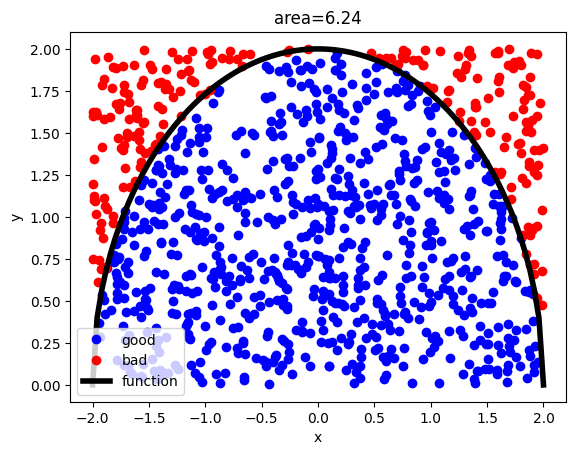

In [ ]:
# your code to calculate the area of a half circle using monte carlo
x=np.random.uniform(-2,2,1000)
y=np.random.uniform(0,2,1000)
mcintegrate(x,y,visualize=True)